In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
titanic = sns.load_dataset('titanic')

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_group    714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [42]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Middle Aged


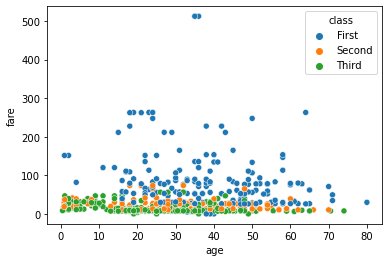

In [24]:
#Scatterplot of fare vs. age, colored by class
sns.scatterplot(x='age', y='fare', hue='class', data=titanic)
plt.show()

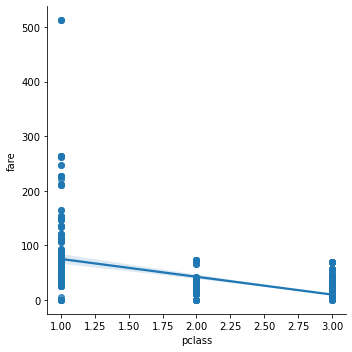

In [25]:
plot_2 = sns.lmplot(x="pclass", y="fare", data=titanic)

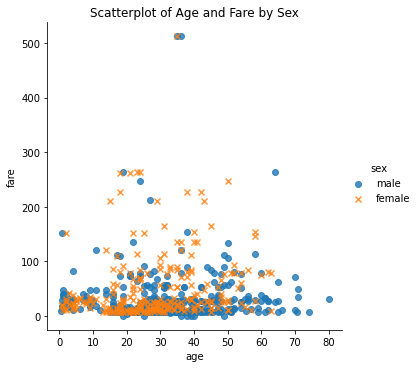

In [26]:
# Create a scatterplot with the fare and age variables
sns.lmplot(x='age', y='fare', data=titanic, fit_reg=False, hue='sex', markers=['o', 'x'], height=5)

# Set the title of the scatterplot
plt.title('Scatterplot of Age and Fare by Sex')

# Show the plot
plt.show()

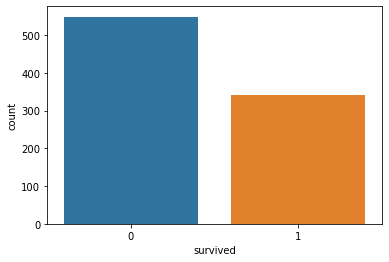

In [27]:
#Countplot of survivors vs. non-survivors : 0 = did not survive, 1 = survived
sns.countplot(x='survived', data=titanic)
plt.show()

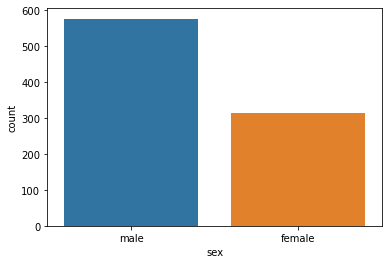

In [28]:
#no. of male and female on the ship
plot_1 = sns.countplot(x="sex", data=titanic)   

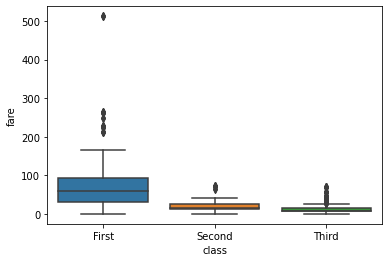

In [29]:
#Boxplot of fare vs. class
sns.boxplot(x='class', y='fare', data=titanic)
plt.show()

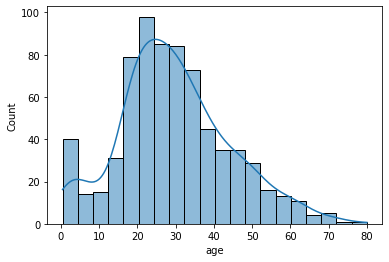

In [30]:
#Histogram of passenger ages
sns.histplot(data=titanic, x='age', kde=True)
plt.show()

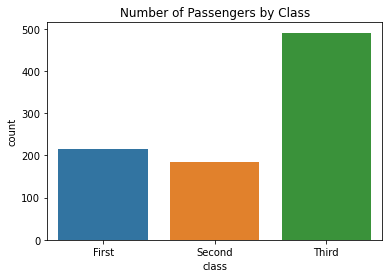

In [31]:
# Create a bar plot of the number of passengers by class
sns.countplot(x='class', data=titanic)

# Set the title of the bar plot
plt.title('Number of Passengers by Class')

# Show the plot
plt.show()

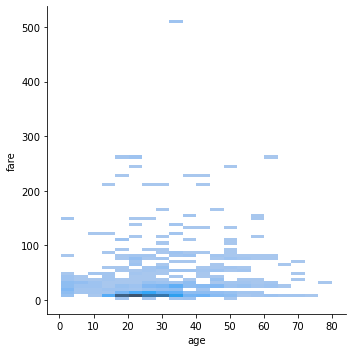

In [32]:
#Histogram for age vs fare
sns.displot(data=titanic, x="age", y="fare", kind = "hist")

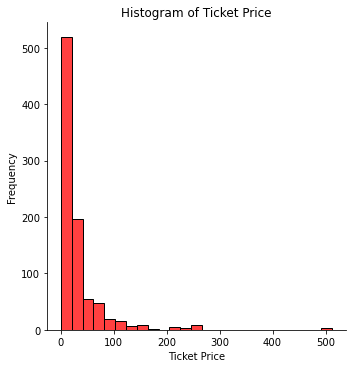

In [33]:
# Create a histogram of the ticket price distribution
sns.displot(titanic['fare'], kde=False, bins=25, color='red')

# Set the title of the histogram
plt.title('Histogram of Ticket Price')

# Set the x-axis label
plt.xlabel('Ticket Price')

# Set the y-axis label
plt.ylabel('Frequency')

# Show the plot
plt.show()

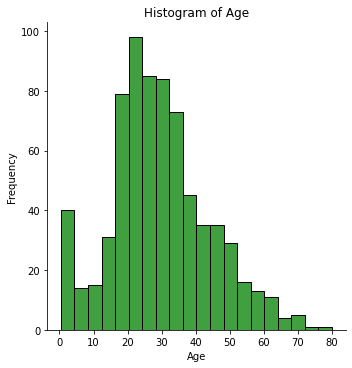

In [34]:
# Create a histogram for 'Age'
sns.displot(titanic['age'].dropna(), kde=False, bins=20, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

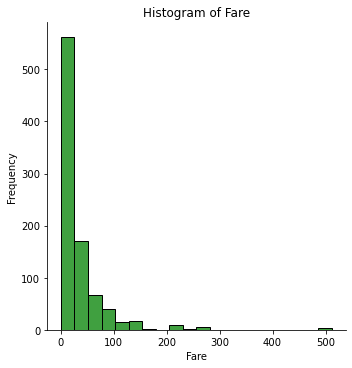

In [35]:
# Create a histogram for 'Fare'
sns.displot(titanic['fare'],  bins=20, color='green')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare')
plt.show()

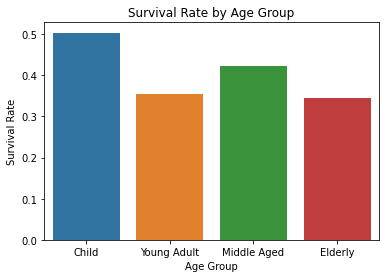

In [36]:
# Create a new column 'age_group' to categorize passengers by age
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Middle Aged', 'Elderly'])

# Calculate the survival rate for each age group
age_group_survival = titanic.groupby('age_group')['survived'].mean().reset_index()

# Create a bar plot of the survival rate by age group
sns.barplot(x='age_group', y='survived', data=age_group_survival)

# Set the title of the bar plot
plt.title('Survival Rate by Age Group')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

In [37]:
# Create a new column 'age_group' to categorize passengers by age
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Middle Aged', 'Elderly'])

# Create a cross tabulation table of age group and survival
survival_table = pd.crosstab(titanic['age_group'], titanic['survived'], values=titanic['survived'], aggfunc='count')

# Print the cross tabulation table
print(survival_table)

survived       0    1
age_group            
Child         69   70
Young Adult  174   96
Middle Aged  139  102
Elderly       42   22


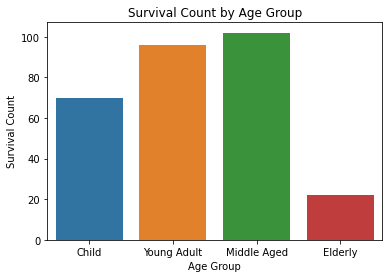

In [38]:
# Rename the column labels
survival_table.columns = ['Did not survive', 'Survived']

# Create a bar plot of the survival count by age group
sns.barplot(x=survival_table.index, y='Survived', data=survival_table)

# Set the title of the bar plot
plt.title('Survival Count by Age Group')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Survival Count')

# Show the plot
plt.show()


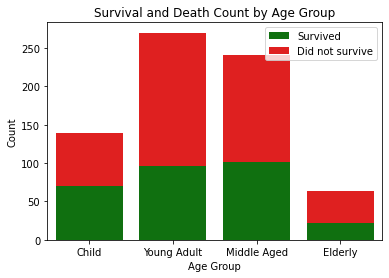

In [39]:
# Create a bar plot of the survival count by age group
sns.barplot(x=survival_table.index, y='Survived', data=survival_table, color='green', label='Survived')

# Create a bar plot of the death count by age group
sns.barplot(x=survival_table.index, y='Did not survive', data=survival_table, color='red', label='Did not survive', bottom=survival_table['Survived'])

# Set the title of the bar plot
plt.title('Survival and Death Count by Age Group')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Count')

# Show the legend
plt.legend()

# Show the plot
plt.show()